## Pengujian

### Import Library and model

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from ffnn import FFNN 
import matplotlib.pyplot as plt

def create_model(input_size, output_size, hidden_layers, activations, loss_function, weight_init):
    layer_sizes = [input_size] + hidden_layers + [output_size]
    
    model = FFNN(
        layer_sizes=layer_sizes,
        activation_functions=activations,
        loss_function=loss_function,
        weight_initialization=weight_init,
        weight_init_params={'seed': 42}
    )
    
    return model

### Export Dataset

In [2]:
def load_data(dataset_name="mnist_784"):
    print(f"Loading {dataset_name} dataset...")

    X, y = fetch_openml(dataset_name, version=1, return_X_y=True, as_frame=False)
    
    if y.dtype == object:
        y = y.astype(int)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    encoder = OneHotEncoder(sparse_output=False)
    y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
    y_test_encoded = encoder.transform(y_test.reshape(-1, 1))
    
    print(f"Data loaded. Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")
    
    return X_train, X_test, y_train_encoded, y_test_encoded, y_train, y_test

X_train, X_test, y_train_encoded, y_test_encoded, y_train_original, y_test_original = load_data("mnist_784")
input_size = X_train.shape[1]
output_size = y_train_encoded.shape[1]


Loading mnist_784 dataset...
Data loaded. Training samples: 56000, Test samples: 14000


### Pengaruh depth (banyak layer) dan width (banyak neuron per layer)

In [3]:
modelDepth1 = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128],
        activations=['relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )

modelDepth2 = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128, 128],
        activations=['relu', 'relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )

modelDepth3 = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128, 128, 128],
        activations=['relu', 'relu', 'relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )

modelWidth1 = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[16],
        activations=['relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )

modelWidth2 = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[32],
        activations=['relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )

modelWidth3 = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[64],
        activations=['relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )


In [4]:
history1 = modelDepth1.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

history2 = modelDepth2.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

history3 = modelDepth3.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

history4 = modelWidth1.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

history5 = modelWidth2.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

history6 = modelWidth3.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )


=== Perbandingan Akurasi ===
Variasi Depth (Width = 128):
Depth 1: 0.8903
Depth 2: 0.8989
Depth 3: 0.9016
Variasi Width (Depth = 1):
Width 16: 0.8716
Width 32: 0.8815
Width 64: 0.8890

=== Grafik Loss ===


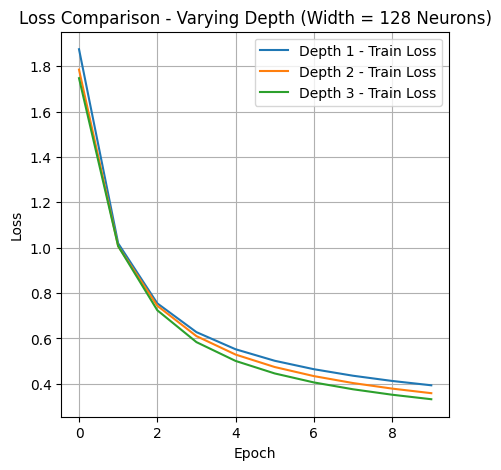

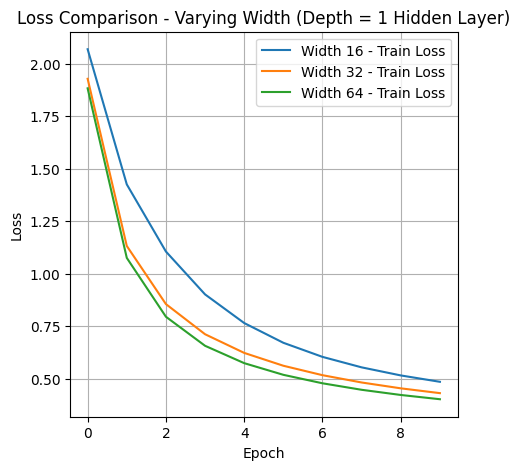

In [5]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))
    return accuracy

def plot_loss_comparison(histories, labels, title):
    plt.figure(figsize=(5, 5))
    for history, label in zip(histories, labels):
        plt.plot(history, label=f'{label} - Train Loss') 
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

print("\n=== Perbandingan Akurasi ===")
acc_depth1 = evaluate_model(modelDepth1, X_test, y_test_encoded)
acc_depth2 = evaluate_model(modelDepth2, X_test, y_test_encoded)
acc_depth3 = evaluate_model(modelDepth3, X_test, y_test_encoded)
acc_width1 = evaluate_model(modelWidth1, X_test, y_test_encoded)
acc_width2 = evaluate_model(modelWidth2, X_test, y_test_encoded)
acc_width3 = evaluate_model(modelWidth3, X_test, y_test_encoded)

print("Variasi Depth (Width = 128):")
print(f"Depth 1: {acc_depth1:.4f}")
print(f"Depth 2: {acc_depth2:.4f}")
print(f"Depth 3: {acc_depth3:.4f}")
print("Variasi Width (Depth = 1):")
print(f"Width 16: {acc_width1:.4f}")
print(f"Width 32: {acc_width2:.4f}")
print(f"Width 64: {acc_width3:.4f}")

depth_histories = [history1['train_loss'], history2['train_loss'], history3['train_loss']]
depth_labels = ['Depth 1', 'Depth 2', 'Depth 3']
width_histories = [history4['train_loss'], history5['train_loss'], history6['train_loss']]
width_labels = ['Width 16', 'Width 32', 'Width 64']

print("\n=== Grafik Loss ===")
plot_loss_comparison(depth_histories, depth_labels, 'Loss Comparison - Varying Depth (Width = 128 Neurons)')
plot_loss_comparison(width_histories, width_labels, 'Loss Comparison - Varying Width (Depth = 1 Hidden Layer)')

Akurasi meningkat dengan seiring bertambahnya hidden layer (depth). Peningkatan ini menunjukkan bahwa model dengan depth lebih dalam mampu menangkap pola yang lebih kompleks dalam data, yang berkontribusi pada performa yang lebih baik.

Akurasi meningkat dengan seiring bertambahnya jumlah neuron per layer (width). Ini menunjukkan bahwa model dengan width lebih besar dapat mempelajari fitur yang lebih kaya dari data, sehingga meningkatkan performa.

Semua kurva menunjukkan penurunan tajam pada awal pelatihan (epoch 0 hingga 4), diikuti oleh dengan kestabilan setelah epoch 4. Ini menunjukkan bahwa model cepat menyesuaikan bobotnya dengan data pada fase awal pelatihan.


### Pengaruh fungsi aktivasi hidden layer

In [6]:
modelRelu = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128],
        activations=['relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )

modelLinear = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128],
        activations=['linear', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )

modelSigmoid = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128],
        activations=['sigmoid', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )

modelTanh = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128],
        activations=['tanh', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )

modelLeakyRelu = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128],
        activations=['leaky_relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )

modelElu = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128],
        activations=['elu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )

In [7]:
historyAct1 = modelRelu.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

historyAct2 = modelLinear.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

historyAct3 = modelSigmoid.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

historyAct4 = modelTanh.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

historyAct5 = modelLeakyRelu.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

historyAct6 = modelElu.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )


=== Perbandingan Akurasi ===
Variasi Aktivasi:
Relu: 0.8906
Linear: 0.8894
Sigmoid: 0.8199
Tanh: 0.8766
Leaky Relu: 0.8897
Elu: 0.8884

=== Grafik Loss ===


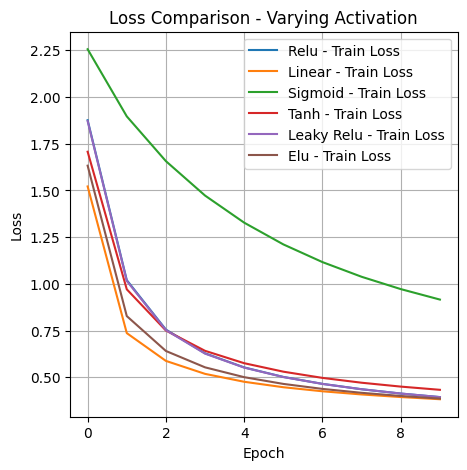


=== Distribusi Bobot dan Gradien Bobot ===

Relu


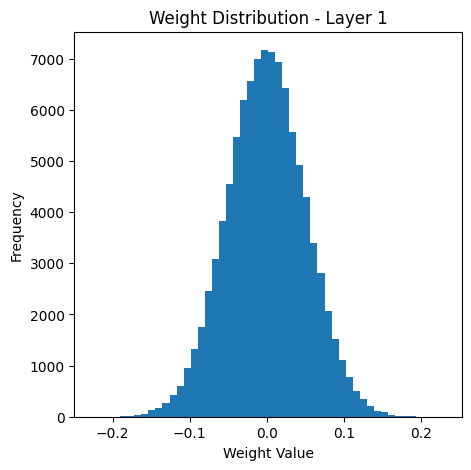

None


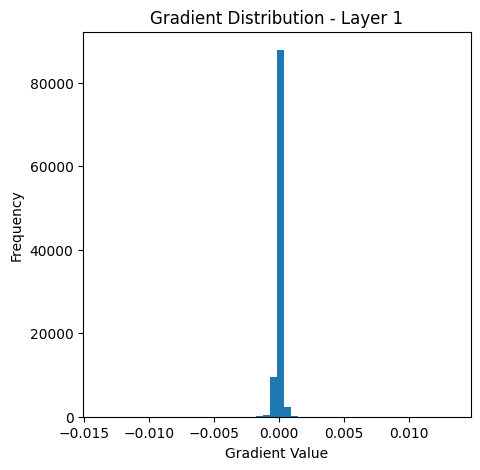

None

Linear


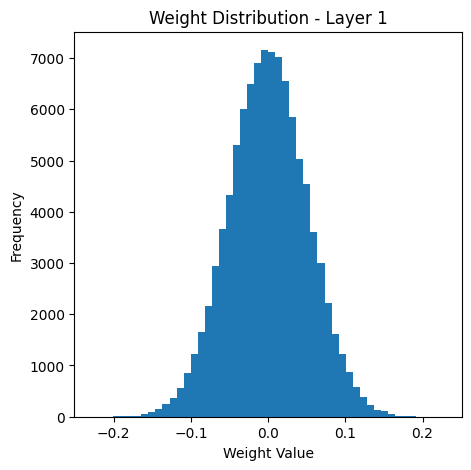

None


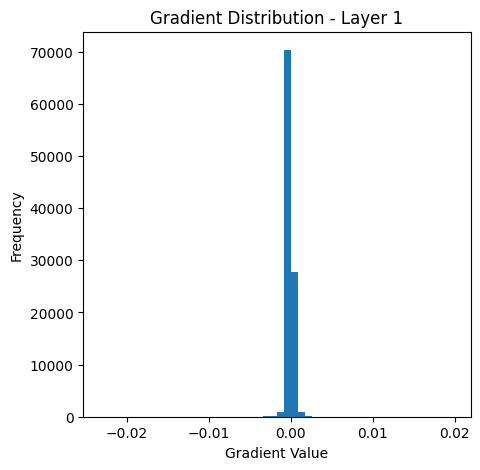

None

Sigmoid


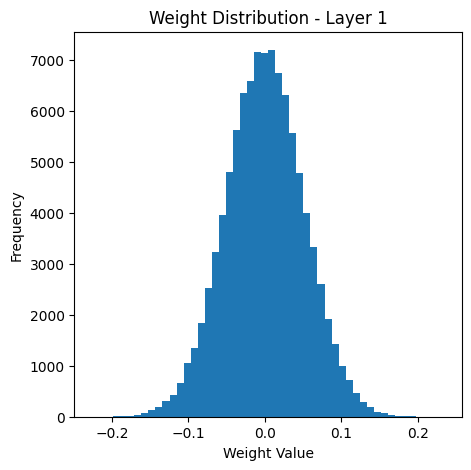

None


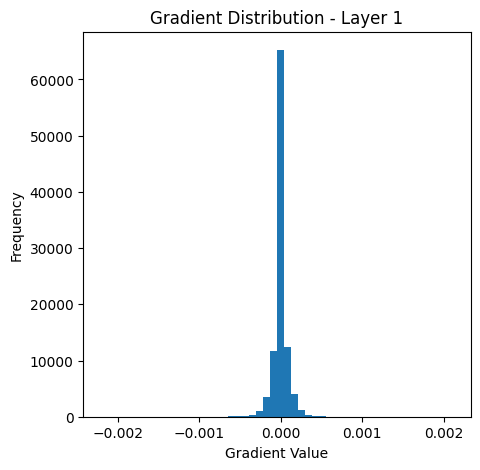

None

Tanh


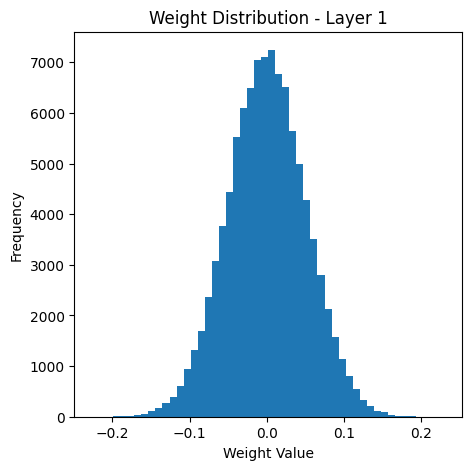

None


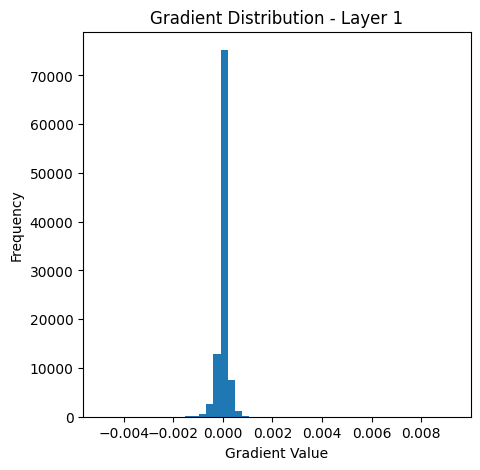

None

LeakyRelu


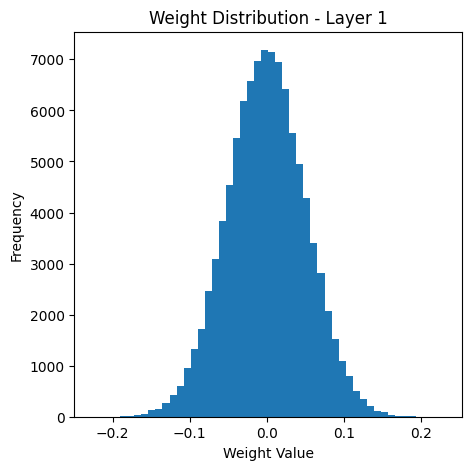

None


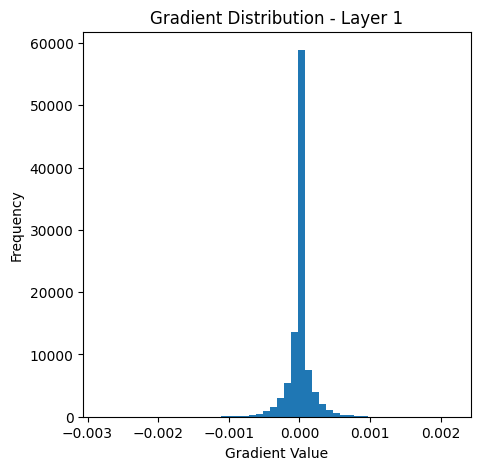

None

Elu


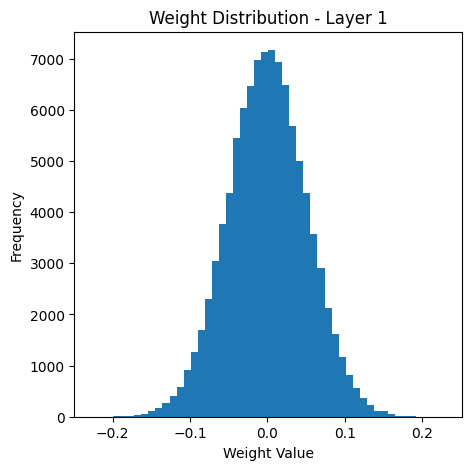

None


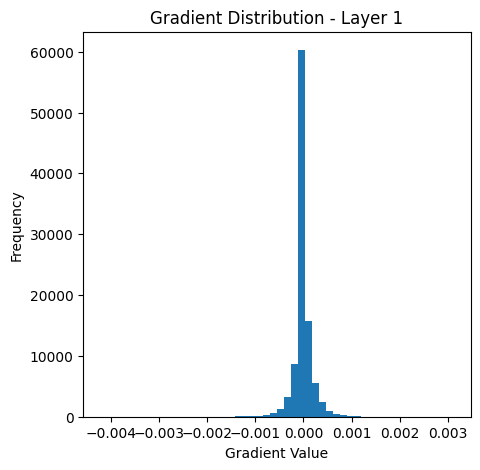

None


In [8]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))
    return accuracy

def plot_loss_comparison(histories, labels, title):
    plt.figure(figsize=(5, 5))
    for history, label in zip(histories, labels):
        plt.plot(history, label=f'{label} - Train Loss') 
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

print("\n=== Perbandingan Akurasi ===")
acc_1 = evaluate_model(modelRelu, X_test, y_test_encoded)
acc_2 = evaluate_model(modelLinear, X_test, y_test_encoded)
acc_3 = evaluate_model(modelSigmoid, X_test, y_test_encoded)
acc_4 = evaluate_model(modelTanh, X_test, y_test_encoded)
acc_5 = evaluate_model(modelLeakyRelu, X_test, y_test_encoded)
acc_6 = evaluate_model(modelElu, X_test, y_test_encoded)

print("Variasi Aktivasi:")
print(f"Relu: {acc_1:.4f}")
print(f"Linear: {acc_2:.4f}")
print(f"Sigmoid: {acc_3:.4f}")
print(f"Tanh: {acc_4:.4f}")
print(f"Leaky Relu: {acc_5:.4f}")
print(f"Elu: {acc_6:.4f}")

histories = [historyAct1['train_loss'], historyAct2['train_loss'], historyAct3['train_loss'], historyAct4['train_loss'], historyAct5['train_loss'], historyAct6['train_loss']]
labels = ['Relu', 'Linear', 'Sigmoid', 'Tanh', 'Leaky Relu', 'Elu']

print("\n=== Grafik Loss ===")
plot_loss_comparison(histories, labels, 'Loss Comparison - Varying Activation')

print("\n=== Distribusi Bobot dan Gradien Bobot ===")
print("\nRelu")
print(modelRelu.plot_weight_distribution(list(range(len(modelRelu.weights)))))
print(modelRelu.plot_gradient_distribution(list(range(len(modelRelu.gradients_w)))))
print("\nLinear")
print(modelLinear.plot_weight_distribution(list(range(len(modelLinear.weights)))))
print(modelLinear.plot_gradient_distribution(list(range(len(modelLinear.gradients_w)))))
print("\nSigmoid")
print(modelSigmoid.plot_weight_distribution(list(range(len(modelSigmoid.weights)))))
print(modelSigmoid.plot_gradient_distribution(list(range(len(modelSigmoid.gradients_w)))))
print("\nTanh")
print(modelTanh.plot_weight_distribution(list(range(len(modelTanh.weights)))))
print(modelTanh.plot_gradient_distribution(list(range(len(modelTanh.gradients_w)))))
print("\nLeakyRelu")
print(modelLeakyRelu.plot_weight_distribution(list(range(len(modelLeakyRelu.weights)))))
print(modelLeakyRelu.plot_gradient_distribution(list(range(len(modelLeakyRelu.gradients_w)))))
print("\nElu")
print(modelElu.plot_weight_distribution(list(range(len(modelElu.weights)))))
print(modelElu.plot_gradient_distribution(list(range(len(modelElu.gradients_w)))))


ReLU, Leaky RelU, Elu, dan Linear menunjukkan akurasi yang sangat tinggi dan mirip, dengan ReLU mencapai nilai tertinggi (0.8906). Sigmoid memiliki akurasi terendah (0.8199), jauh di bawah fungsi aktivasi lainnya. Hal ini menunjukan bahwa Sigmoid kurang efektif untuk dataset ini.

Semua fungsi aktivasi kecuali Sigmoid menunjukkan penurunan loss yang cepat dan stabil, mencapai nilai akhir sekitar 0.75 pada epoch 10. Ini menunjukkan bahwa ReLU, Linear, Tanh, Leaky ReLU, dan ELU efektif dalam mengoptimalkan model. Sementara sigmoid memiliki penurunan loss yang lebih lambat dan berhenti pada nilai yang lebih tinggi (~1.0), yang konsisten dengan akurasi terendahnya (0.8199).

Distribusi bobot yang menyerupai distribusi normal dengan rata-rata mendekati 0 menunjukkan bahwa inisialisasi bobot yang digunakan telah berhasil menciptakan distribusi yang seimbang. Distribusi gradien yang sangat terkonsentrasi di sekitar 0 menunjukkan bahwa sebagian besar gradien bobot sangat kecil, hal ini menunjukkan bahwa pelatihan model cenderung stabil, tetapi gradien yang sangat kecil dapat memperlambat pembelajaran pada layer yang lebih depth.


### Pengaruh learning rate

In [9]:
modelLR001 = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128],
        activations=['relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )

modelLR005 = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128],
        activations=['relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )

modelLR01 = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128],
        activations=['relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )


In [10]:
historyLR001 = modelLR001.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

historyLR005 = modelLR005.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.05,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

historyLR01 = modelLR01.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.1,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )


=== Perbandingan Akurasi ===
Variasi Learning Rate:
0.01: 0.8906
0.05: 0.9355
0.1: 0.9490

=== Grafik Loss ===


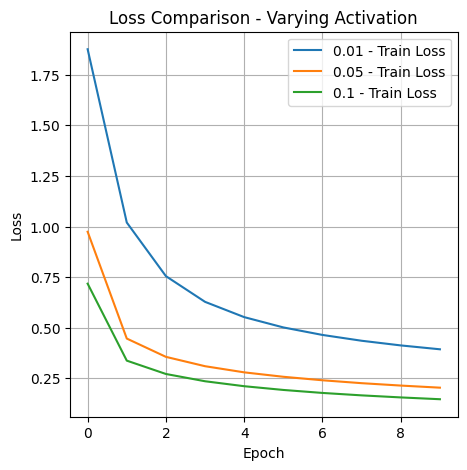


=== Distribusi Bobot dan Gradien Bobot ===

LR 0.01


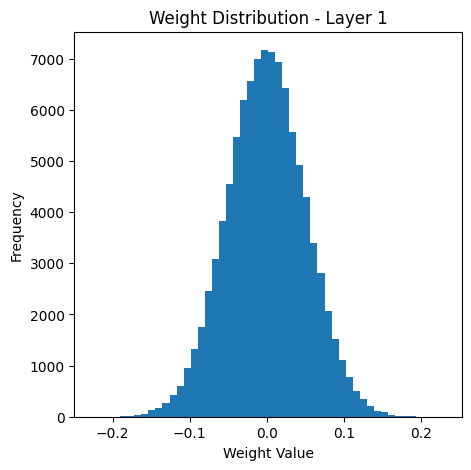

None


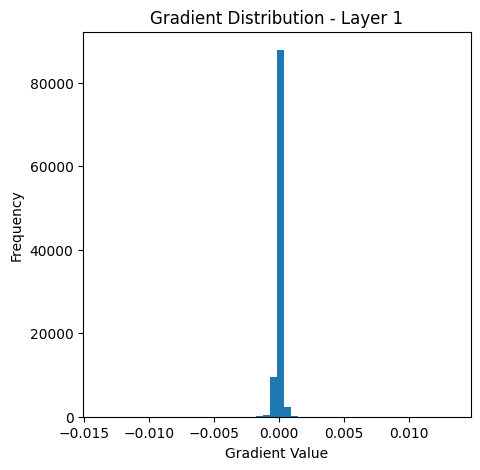

None

LR 0.05


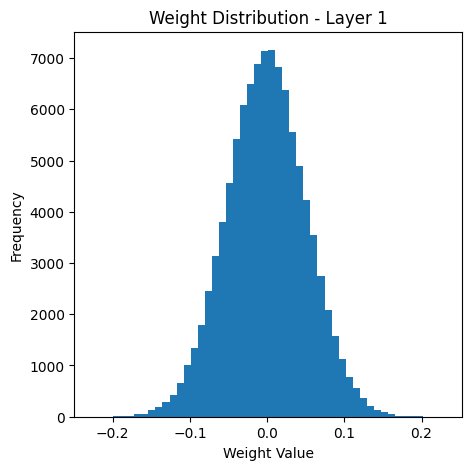

None


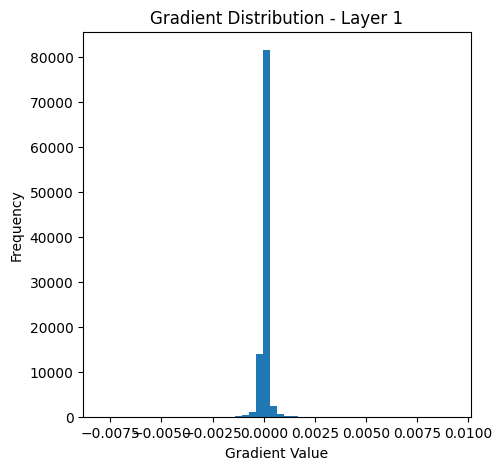

None

LR 0.1


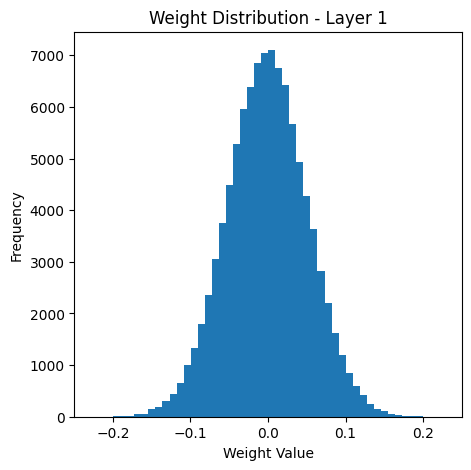

None


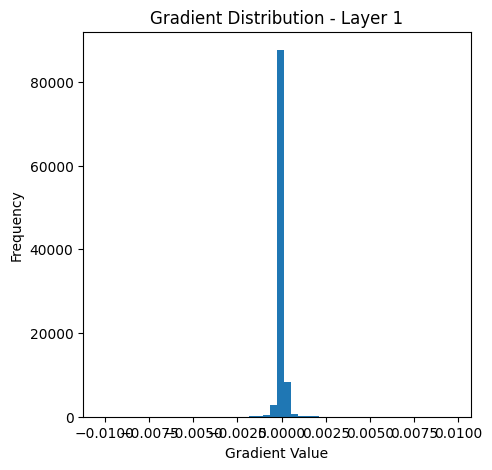

None


In [11]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))
    return accuracy

def plot_loss_comparison(histories, labels, title):
    plt.figure(figsize=(5, 5))
    for history, label in zip(histories, labels):
        plt.plot(history, label=f'{label} - Train Loss') 
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

print("\n=== Perbandingan Akurasi ===")
acc_1 = evaluate_model(modelLR001, X_test, y_test_encoded)
acc_2 = evaluate_model(modelLR005, X_test, y_test_encoded)
acc_3 = evaluate_model(modelLR01, X_test, y_test_encoded)

print("Variasi Learning Rate:")
print(f"0.01: {acc_1:.4f}")
print(f"0.05: {acc_2:.4f}")
print(f"0.1: {acc_3:.4f}")

histories = [historyLR001['train_loss'], historyLR005['train_loss'], historyLR01['train_loss']]
labels = ['0.01', '0.05', '0.1']

print("\n=== Grafik Loss ===")
plot_loss_comparison(histories, labels, 'Loss Comparison - Varying Activation')

print("\n=== Distribusi Bobot dan Gradien Bobot ===")
print("\nLR 0.01")
print(modelLR001.plot_weight_distribution(list(range(len(modelLR001.weights)))))
print(modelLR001.plot_gradient_distribution(list(range(len(modelLR001.gradients_w)))))
print("\nLR 0.05")
print(modelLR005.plot_weight_distribution(list(range(len(modelLR005.weights)))))
print(modelLR005.plot_gradient_distribution(list(range(len(modelLR005.gradients_w)))))
print("\nLR 0.1")
print(modelLR01.plot_weight_distribution(list(range(len(modelLR01.weights)))))
print(modelLR01.plot_gradient_distribution(list(range(len(modelLR01.gradients_w)))))

Akurasi meningkat seiring dengan peningkatan learning rate. Learning rate 0.1 menghasilkan akurasi tertinggi (0.9490), diikuti oleh 0.05 (0.9355), dan 0.01 (0.8906), hal Ini menunjukkan bahwa meskipun learning rate yang lebih tinggi terus meningkatkan akurasi, keuntungan tambahan semakin mengecil seiring learning rate bertambah besar.

Semua kurva menunjukkan penurunan loss yang signifikan pada awal pelatihan (epoch 0 hingga 2), diikuti oleh penurunan yang lebih lambat hingga stabil pada epoch 10. Learning rate 0.01 memiliki penurunan yang kurang baik jika dibandingkan dengan learning rate yang lain (perbedaanya cukup jauh).

Distribusi bobot yang menyerupai distribusi normal dengan rata-rata mendekati 0 menunjukkan bahwa inisialisasi bobot yang digunakan telah berhasil menciptakan distribusi yang seimbang. Distribusi gradien yang sangat terkonsentrasi di sekitar 0 menunjukkan bahwa sebagian besar gradien bobot sangat kecil, hal ini menunjukkan bahwa pelatihan model cenderung stabil, tetapi gradien yang sangat kecil dapat memperlambat pembelajaran pada layer yang lebih depth.

### Pengaruh inisialisasi bobot

In [12]:
modelZeros = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128],
        activations=['relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='zeros'
    )

modelRandomUniform = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128],
        activations=['relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='random_uniform'
    )

modelRandomNormal = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128],
        activations=['relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='random_normal'
    )

modelHe = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128],
        activations=['relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='he'
    )

modelXavier = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[128],
        activations=['relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='xavier'
    )

In [13]:
historyZeros = modelZeros.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

historyRandomUniform = modelRandomUniform.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

historyRandomNormal = modelRandomNormal.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

historyXavier = modelXavier.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )

historyHe = modelHe.fit(
        X_train=X_train,
        y_train=y_train_encoded,
        batch_size=32,
        learning_rate=0.01,
        epochs=10,
        X_val=X_test,
        y_val=y_test_encoded,
        verbose=0
    )



=== Perbandingan Akurasi ===
Variasi Inisiasi Bobot:
Zeros: 0.1143
Random Uniform: 0.8709
Random Normal: 0.8269
Xavier: 0.8921
He: 0.8902

=== Grafik Loss ===


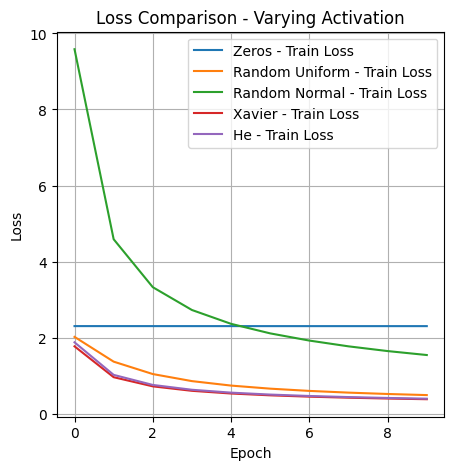


=== Distribusi Bobot dan Gradien Bobot ===

Zeros


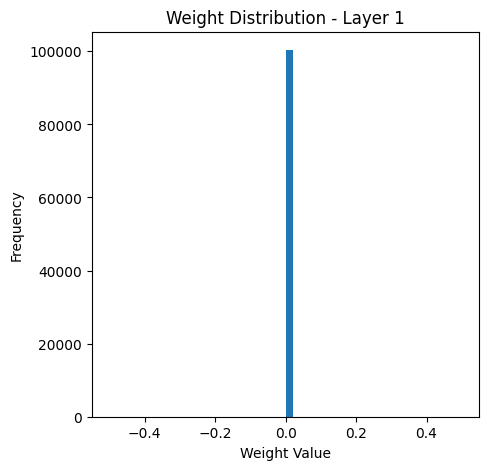

None


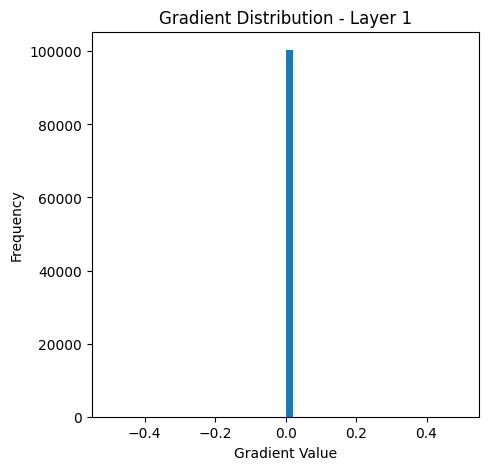

None

Random Uniform


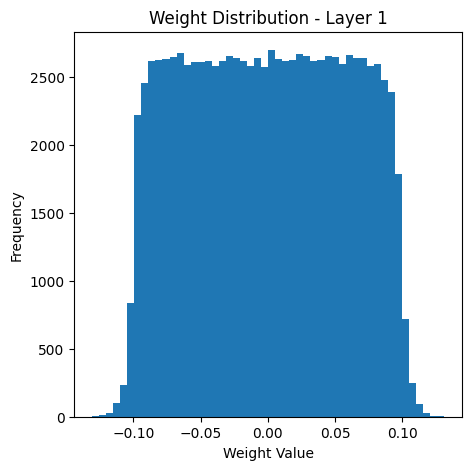

None


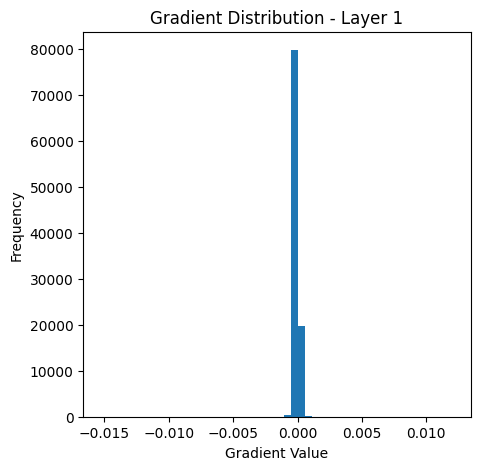

None

Random Normal


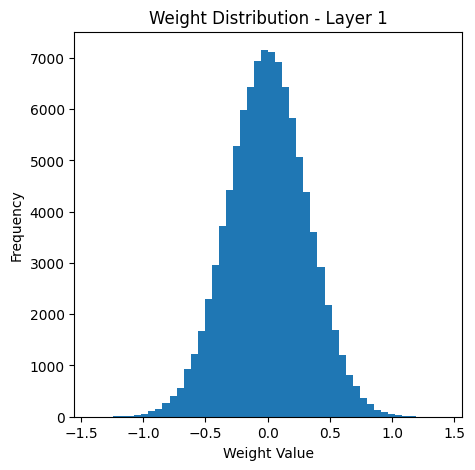

None


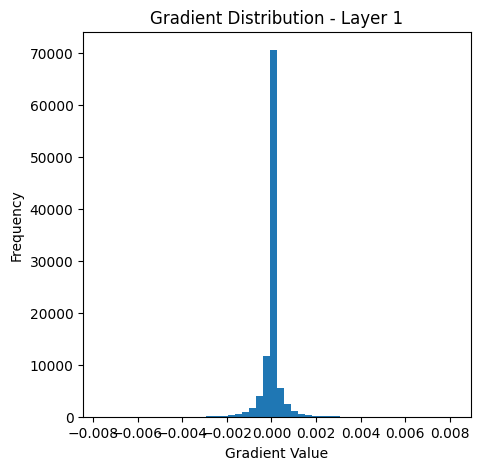

None

Xavier


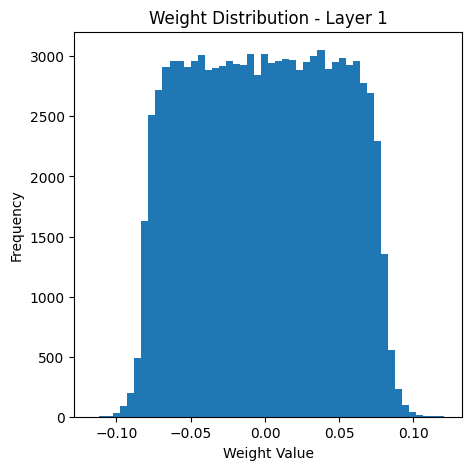

None


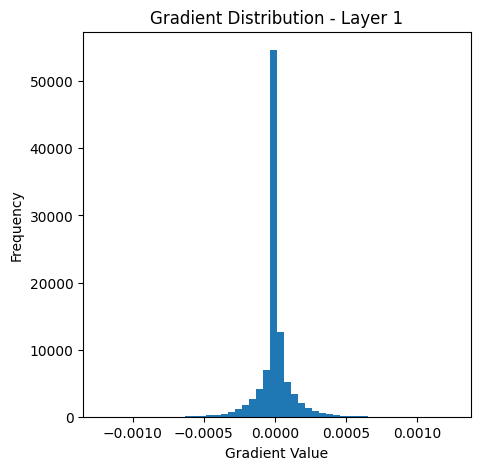

None

He


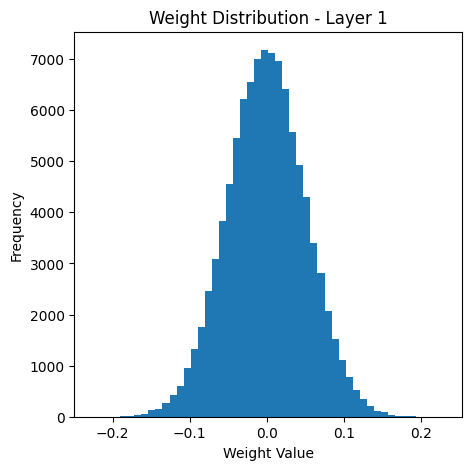

None


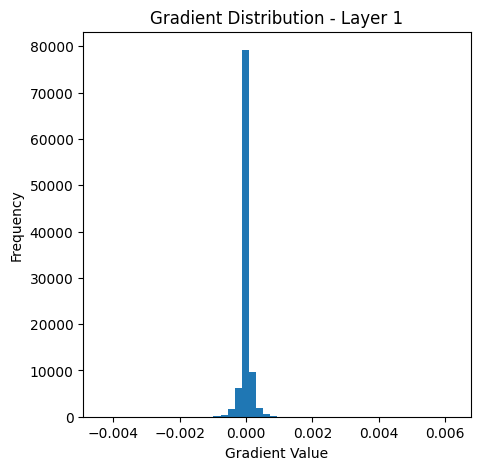

None


In [14]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))
    return accuracy

def plot_loss_comparison(histories, labels, title):
    plt.figure(figsize=(5, 5))
    for history, label in zip(histories, labels):
        plt.plot(history, label=f'{label} - Train Loss') 
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

print("\n=== Perbandingan Akurasi ===")
acc_1 = evaluate_model(modelZeros, X_test, y_test_encoded)
acc_2 = evaluate_model(modelRandomUniform, X_test, y_test_encoded)
acc_3 = evaluate_model(modelRandomNormal, X_test, y_test_encoded)
acc_4 = evaluate_model(modelXavier, X_test, y_test_encoded)
acc_5 = evaluate_model(modelHe, X_test, y_test_encoded)

print("Variasi Inisiasi Bobot:")
print(f"Zeros: {acc_1:.4f}")
print(f"Random Uniform: {acc_2:.4f}")
print(f"Random Normal: {acc_3:.4f}")
print(f"Xavier: {acc_4:.4f}")
print(f"He: {acc_5:.4f}")

histories = [historyZeros['train_loss'], historyRandomUniform['train_loss'], historyRandomNormal['train_loss'], historyXavier['train_loss'], historyHe['train_loss']]
labels = ['Zeros', 'Random Uniform', 'Random Normal', 'Xavier', 'He']

print("\n=== Grafik Loss ===")
plot_loss_comparison(histories, labels, 'Loss Comparison - Varying Activation')

print("\n=== Distribusi Bobot dan Gradien Bobot ===")
print("\nZeros")
print(modelZeros.plot_weight_distribution(list(range(len(modelZeros.weights)))))
print(modelZeros.plot_gradient_distribution(list(range(len(modelZeros.gradients_w)))))
print("\nRandom Uniform")
print(modelRandomUniform.plot_weight_distribution(list(range(len(modelRandomUniform.weights)))))
print(modelRandomUniform.plot_gradient_distribution(list(range(len(modelRandomUniform.gradients_w)))))
print("\nRandom Normal")
print(modelRandomNormal.plot_weight_distribution(list(range(len(modelRandomNormal.weights)))))
print(modelRandomNormal.plot_gradient_distribution(list(range(len(modelRandomNormal.gradients_w)))))
print("\nXavier")
print(modelXavier.plot_weight_distribution(list(range(len(modelXavier.weights)))))
print(modelXavier.plot_gradient_distribution(list(range(len(modelXavier.gradients_w)))))
print("\nHe")
print(modelHe.plot_weight_distribution(list(range(len(modelHe.weights)))))
print(modelHe.plot_gradient_distribution(list(range(len(modelHe.gradients_w)))))


Xavier, He, dan Random Uniform menunjukkan akurasi yang sangat tinggi dan mirip, dengan Xavier mencapai nilai tertinggi (0.8921). Zeros memiliki akurasi terendah (0.1143), jauh di bawah fungsi aktivasi lainnya. Hal ini menunjukkan bahwa inisialisasi semua bobot ke nol menyebabkan masalah simetri, di mana neuron-neuron dalam layer yang sama belajar fitur yang identik, sehingga model gagal menangkap pola yang bermakna.

Inisialisasi bobot dengan metode Zeros menghasilkan loss yang tinggi dan stagnan, sehingga mendapatkan akurasi yang buruk (0.1143), karena gradien yang seragam atau hilang menyebabkan pembelajaran tidak efektif, sedangkan metode Xavier dan He memberikan penurunan loss yang paling signifikan dan stabil, dengan He mencapai loss terendah (~0.5) pada epoch 8, yang berkaitan dengan akurasi tertinggi (0.8921 dan 0.8902), menunjukkan bahwa kedua metode ini mendukung pelatihan yang optimal.

Distribusi bobot pada metode Zeros menunjukkan inisialisasi yang seragam yang menyebabkan simetri dan kegagalan dalam melakukan pembelajaran, sehingga menyebabkan akurasi rendah (0.1143). Distribusi bobot pada metode Random Uniform dan Xavier menunjukkan puncak lebar, mencerminkan inisialisasi yang seimbang dan mendukung pembelajaran efektif dengan akurasi yang baik. Distribusi bobot pada metode Random Normal dan He menunjukkan puncak tajam di sekitar 0, mencerminkan inisialisasi yang seimbang dimana mengarah ke nilai 0 sehingga membuat akurasi cukup baik.


### Perbandingan hasil prediksi dengan library sklearn MLP

In [9]:
hidden_layer_sizes = (64) 
activation = 'relu'       
learning_rate = 0.01           
batch_size = 32                
epochs = 10                    
random_state = 42              

ffnn_model = create_model(
        input_size=input_size,
        output_size=output_size,
        hidden_layers=[64],
        activations=['relu', 'softmax'],
        loss_function='categorical_crossentropy',
        weight_init='random_uniform'
    )

ffnn_history = ffnn_model.fit(
    X_train=X_train,
    y_train=y_train_encoded,
    batch_size=batch_size,
    learning_rate=learning_rate,
    epochs=epochs,
    X_val=X_test,
    y_val=y_test_encoded,
    verbose=0
)

sklearn_model = MLPClassifier(
    hidden_layer_sizes=hidden_layer_sizes,  
    activation=activation,                 
    learning_rate_init=learning_rate,       
    batch_size=batch_size,                 
    max_iter=epochs,                        
    random_state=random_state,              
    solver='sgd',                          
    verbose=False                            
)
sklearn_model.fit(X_train, y_train_original)

c:\Users\preda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=32, hidden_layer_sizes=64, learning_rate_init=0.01,
              max_iter=10, random_state=42, solver='sgd')

In [10]:
def evaluate_model_ffnn(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))
    return accuracy

def evaluate_model_sklearn(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    return accuracy

print("\n=== Perbandingan Akurasi ===")
ffnn_accuracy = evaluate_model_ffnn(ffnn_model, X_test, y_test_encoded)
sklearn_accuracy = evaluate_model_sklearn(sklearn_model, X_test, y_test_original)

print(f"FFNN Akurasi: {ffnn_accuracy:.4f}")
print(f"sklearn MLP Akurasi: {sklearn_accuracy:.4f}")


=== Perbandingan Akurasi ===
FFNN Akurasi: 0.8483
sklearn MLP Akurasi: 0.9678


Implementasi FFNN dari scratch mencapai akurasi (0.8483), yang menunjukkan kemampuan model dalam menangkap pola pada dataset MNIST cukup baik, tetapi masih kalah dibandingkan scikit-learn MLPClassifier yang mencapai akurasi (0.9647) dengan selisih akurasi sebesar (0.1195).

Scikit-learn MLPClassifier menggunakan algoritma optimasi canggih seperti Adam atau L-BFGS, sedangkan implementasi FFNN dari scratch hanya mengimplementasikan gradient sederhana. Implementasi dari FFNN yang di buat dari scratch memungkinkan banyak implementasi yang kurang efisien jika dibandingkan oleh Scikit-learn MLPClassifier. Hal-hal ini dan beberapa hal optimasi maupun fitur yang tidak ada di FFNN dari scratch lah yang membuat terjadi perbedaan akurasi antara kedua model tersebut.
